# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
#your code here
data = pd.read_csv("data/Boston.csv",sep=",")
data.drop(columns="Unnamed: 0",inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [4]:
'''
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n"

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [5]:
for col in data.columns:
    print("Correlation between medv and ",col,"is ", data["medv"].corr(data[col]))
# Looks like;
# rm:0,69
# lstat: -0,73
# ptratio: -0,507 are most correlated columns with house pricing column (target col.) medv.

# Moderate correlations
# indus: -0.48
# nox: -0.42
# tax: -0.46
# zn: 0.36

Correlation between medv and  crim is  -0.3883046085868115
Correlation between medv and  zn is  0.360445342450543
Correlation between medv and  indus is  -0.48372516002837285
Correlation between medv and  chas is  0.1752601771902986
Correlation between medv and  nox is  -0.4273207723732826
Correlation between medv and  rm is  0.6953599470715393
Correlation between medv and  age is  -0.3769545650045962
Correlation between medv and  dis is  0.24992873408590394
Correlation between medv and  rad is  -0.3816262306397776
Correlation between medv and  tax is  -0.46853593356776685
Correlation between medv and  ptratio is  -0.5077866855375619
Correlation between medv and  black is  0.3334608196570664
Correlation between medv and  lstat is  -0.7376627261740147
Correlation between medv and  medv is  1.0


In [6]:
# Checking correlations between strong corr variables in order to avoid multi-collinearity problem
print("corr between rm and lstat is : ", data["rm"].corr(data["lstat"]))
print("corr between rm and ptratio is : ", data["rm"].corr(data["ptratio"]))
print("corr between lstat and ptratio is : ", data["lstat"].corr(data["ptratio"]))

# Looks like there is a negative moderate collinearity between rm and lstat, considering their des-
# criptions I will keep rm for further analysis which is average number of rooms per dwelling.

corr between rm and lstat is :  -0.6138082718663957
corr between rm and ptratio is :  -0.3555014945590853
corr between lstat and ptratio is :  0.3740443167146765


In [7]:
# Checking correlations between moderate corr variables in order to avoid multi-collinearity problem
print("corr between indus and nox is : ", data["indus"].corr(data["nox"]))
print("corr between indus and tax is : ", data["indus"].corr(data["tax"]))
print("corr between indus and zn is : ", data["indus"].corr(data["zn"]))
print("corr between nox and tax is : ", data["nox"].corr(data["tax"]))
print("corr between nox and zn is : ", data["nox"].corr(data["zn"]))
print("corr between tax and zn is : ", data["tax"].corr(data["zn"]))
# looks like multi-collinearity could be a problem here.

corr between indus and nox is :  0.7636514469209154
corr between indus and tax is :  0.7207601799515424
corr between indus and zn is :  -0.533828186304469
corr between nox and tax is :  0.6680232004030229
corr between nox and zn is :  -0.5166037078279839
corr between tax and zn is :  -0.3145633246775989


In [8]:
# First dropping indus since it has higher effect on correlations with others.
print("corr between nox and tax is : ", data["nox"].corr(data["tax"]))
print("corr between nox and zn is : ", data["nox"].corr(data["zn"]))
print("corr between tax and zn is : ", data["tax"].corr(data["zn"]))

# I'll go further and drop Nox as well since its correlation with price is only 0.42 and also
# causes multicollinearity problem in our dataset.

corr between nox and tax is :  0.6680232004030229
corr between nox and zn is :  -0.5166037078279839
corr between tax and zn is :  -0.3145633246775989


In [9]:
print("corr between nox and zn is : ", data["nox"].corr(data["zn"]))
print("corr between tax and zn is : ", data["tax"].corr(data["zn"]))
# For now corr 0.51 between variables is fine I believe, if needed we will go back and revise this part

corr between nox and zn is :  -0.5166037078279839
corr between tax and zn is :  -0.3145633246775989


In [10]:
# After dropping lstat, I'll further check correlations between remaining variables (strong + moderate
# correlations all togeher)

<AxesSubplot:>

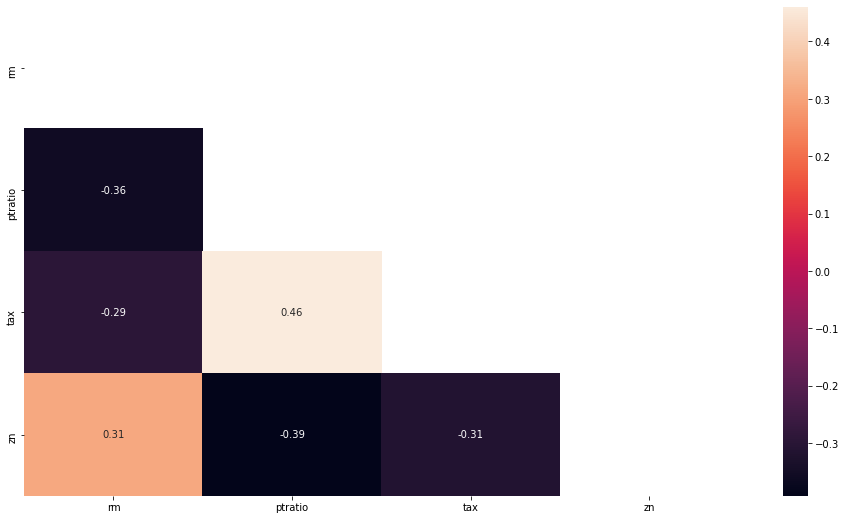

In [11]:
# your plots here

# Checking multi-collinearity heatmap - all looks OK - no moderate-strong corr between variables.
plt.rcParams["figure.figsize"]=(16,9)
mask = np.zeros_like(data[["rm","ptratio","tax","zn"]].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data[["rm","ptratio","tax","zn"]].corr(),annot=True,mask=mask)

Text(0.5, 1.0, 'proportion of residential land zoned for lots over 25.000 sq.ft.')

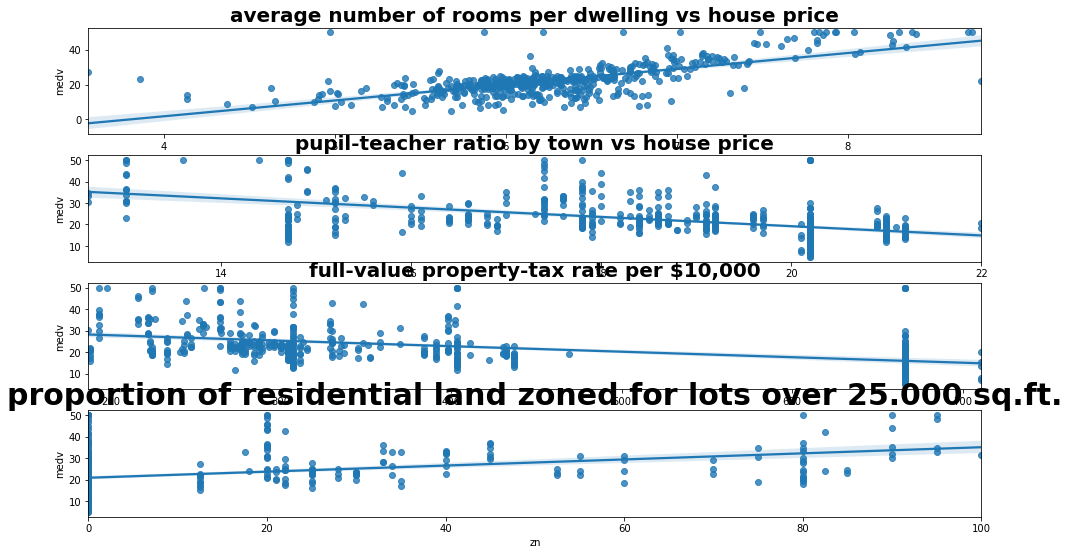

In [12]:
fig, ax = plt.subplots(4,1)
plt.rcParams["figure.figsize"] = (16,40)
sns.regplot(data=data,x="rm",y="medv",ax=ax[0]) # average number of rooms per dwelling
ax[0].set_title("average number of rooms per dwelling vs house price",size=20,fontweight="bold")
sns.regplot(data=data,x="ptratio",y="medv",ax=ax[1]) # pupil-teacher ratio by town
ax[1].set_title("pupil-teacher ratio by town vs house price",size=20,fontweight="bold")
sns.regplot(data=data,x="tax",y="medv",ax=ax[2]) # full-value property-tax rate per $10,000
ax[2].set_title("full-value property-tax rate per $10,000",size=20,fontweight="bold")
sns.regplot(data=data,x="zn",y="medv",ax=ax[3]) # proportion of residential land zoned for lots over 25,000 sq.ft.
ax[3].set_title("proportion of residential land zoned for lots over 25.000 sq.ft.",
                size=30,fontweight="bold")

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [13]:
### Your response here
# Yes, they are pretty much expected since we already new the correlations.
# Numbers of rooms have really strong effect on house prices, in positive way.
# I believe pupil-teacher ratio indicates how educated is the neighborhood.
# prop of residential land zone has weak positiv corr which is around 0.3x , it can also be obsvered.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [14]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

<AxesSubplot:>

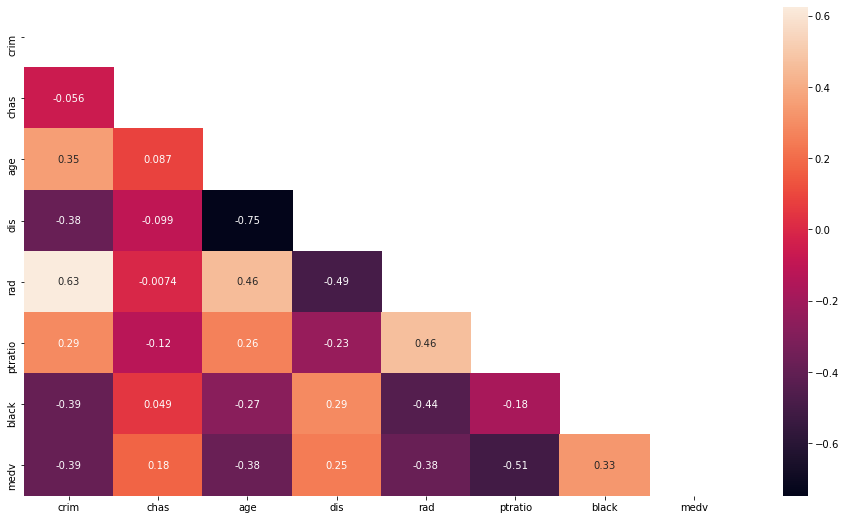

In [15]:
#your code here
plt.rcParams["figure.figsize"] = (16,9)
mask = np.zeros_like(data[['crim', 'chas', 'age', 'dis', 'rad','ptratio', 'black', 'medv']].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data[['crim', 'chas', 'age', 'dis', 'rad','ptratio', 'black', 'medv']].corr(),
            mask=mask,annot=True)

#### Significant correlations


In [16]:
#your code here
# There are some strong corr. between some features but since those features are not highly corr.
# with house pricing, I guess we don't need to consider them.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here
data[["medv"]].describe()

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [18]:
#your code here
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data = shuffle(data)
y = data["medv"]
X = data.drop(columns="medv")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [19]:
#your code here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

RandomForestRegModel2 = RandomForestRegressor(max_depth=2)
RandomForestRegModel4 = RandomForestRegressor(max_depth=4)
RandomForestRegModel6 = RandomForestRegressor(max_depth=6)
RandomForestRegModel8 = RandomForestRegressor(max_depth=8)
RandomForestRegModel10 = RandomForestRegressor(max_depth=10)

RandomForestRegModel2.fit(X_train,y_train)
RandomForestRegModel4.fit(X_train,y_train)
RandomForestRegModel6.fit(X_train,y_train)
RandomForestRegModel8.fit(X_train,y_train)
RandomForestRegModel10.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

Now, plot the score for each tree on the training set and on the testing set.

In [20]:
# Produce a plot with the score for the testing and training for the different max depths

#your code here

# test predictions
y_pred2 = RandomForestRegModel2.predict(X_test)
y_pred4 = RandomForestRegModel4.predict(X_test)
y_pred6 = RandomForestRegModel6.predict(X_test)
y_pred8 = RandomForestRegModel8.predict(X_test)
y_pred10 = RandomForestRegModel10.predict(X_test)

# training predictions
y_pred2_train= RandomForestRegModel2.predict(X_train)
y_pred4_train = RandomForestRegModel4.predict(X_train)
y_pred6_train = RandomForestRegModel6.predict(X_train)
y_pred8_train = RandomForestRegModel8.predict(X_train)
y_pred10_train = RandomForestRegModel10.predict(X_train)

### Model Evaluation

In [21]:
# test data RMSE
mse2 = mean_squared_error(y_test,y_pred2)
rmse2 = np.sqrt(mse2)
print("rmse2: ",rmse2)

mse4 = mean_squared_error(y_test,y_pred4)
rmse4 = np.sqrt(mse4)
print("rmse4: ",rmse4)

mse6 = mean_squared_error(y_test,y_pred6)
rmse6 = np.sqrt(mse6)
print("rmse6: ",rmse6)

mse8 = mean_squared_error(y_test,y_pred8)
rmse8 = np.sqrt(mse8)
print("rmse8: ",rmse8)

mse10 = mean_squared_error(y_test,y_pred10)
rmse10 = np.sqrt(mse10)
print("rmse10: ",rmse10)

rmse2:  4.678324474219878
rmse4:  3.2545067767457683
rmse6:  2.909177178823119
rmse8:  2.917576560270677
rmse10:  2.835062573092551


In [22]:
# training data RMSE
mse2 = mean_squared_error(y_train,y_pred2_train)
rmse2 = np.sqrt(mse2)
print("rmse2: ",rmse2)

mse4 = mean_squared_error(y_train,y_pred4_train)
rmse4 = np.sqrt(mse4)
print("rmse4: ",rmse4)

mse6 = mean_squared_error(y_train,y_pred6_train)
rmse6 = np.sqrt(mse6)
print("rmse6: ",rmse6)

mse8 = mean_squared_error(y_train,y_pred8_train)
rmse8 = np.sqrt(mse8)
print("rmse8: ",rmse8)

mse10 = mean_squared_error(y_train,y_pred10_train)
rmse10 = np.sqrt(mse10)
print("rmse10: ",rmse10)

rmse2:  4.344432819362614
rmse4:  2.6817942722267967
rmse6:  1.935891440003672
rmse8:  1.5058018581431212
rmse10:  1.3419895936212307


In [23]:
data["medv"].mean()

22.532806324110673

In [24]:
# For score of 22, i am not sure how to interpret rmse score. i found somewhere saying that if rmse
# value of training dataset and testing dataset is close, thank it is a good model.

# Considering overfit problem, and difference rmse values between training and testing datasets
# for depth 10, depth of 10 might not be the best model in here.

#### R2 scores

In [25]:
# test scores
print(r2_score(y_test,y_pred2))
print(r2_score(y_test,y_pred4))
print(r2_score(y_test,y_pred6))
print(r2_score(y_test,y_pred8))
print(r2_score(y_test,y_pred10))

0.6723639071308787
0.8414444607812687
0.8733073551336202
0.872574724579654
0.8796804065057128


In [26]:
# training scores
print(r2_score(y_train,y_pred2_train))
print(r2_score(y_train,y_pred4_train))
print(r2_score(y_train,y_pred6_train))
print(r2_score(y_train,y_pred8_train))
print(r2_score(y_train,y_pred10_train))

'''
With score of 0.98 with depth of 10 on training dataset, there is a huge chance of over-fit issue.
'''

0.7871277752980697
0.9188845195263016
0.9577316956141635
0.974426599229288
0.9796880731646913


'\nWith score of 0.98 with depth of 10 on training dataset, there is a huge chance of over-fit issue.\n'

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [27]:
# Your response here
# The deeper the model is the lower the RMSE score which is good I think but we have to be careful
# for over-fitting.

# Also we can see the increasement in R2 score for higher depths. However, looks like there might
# be an overfit problem for depth of 10 - as it can seen in training scores.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [28]:
# Your response here
# Imo, when max depth is set to 10, tree will have too many branches which might cause ML to overfit
# training data. In other words, when max depth is deeper, there will be low biases since model
# will over-fit to training data so on testing set we will observe high variance.

# On the other hand, if we set max depth to one, besides the probability of under-fit, bias between
# data points and training model will be high, however on the testing data set, we will observe
# less variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [29]:
#your code here
# If there is no overfit issue in this example, I'd go with depth of 10 model since it
# gives us the best R2, MSE scores. Looking test data scores, 0.879 for depth of 10 is not proof of
# overfit I believe..

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [30]:
#your code here
mae10 = mean_absolute_error(y_test,y_pred10)
print("mae10: ",mae10)

mae10:  2.0522801741893715


#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [31]:
#your code here
mse10 = mean_squared_error(y_test,y_pred10)
rmse10 = np.sqrt(mse10)
print("rmse10: ",rmse10)

rmse10:  2.835062573092551


#### Create a function that calculates  and returns the r2 score as performance metric

In [32]:
#your code here

#### Calculate the r2 score of the model using the function defined above

In [33]:
#your code here
r2_score(y_test,y_pred10)

0.8796804065057128

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [34]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [35]:
#Your response here
